File descriptions
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().iloc[:,:12]

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  
count  1460.000000  1460.000000  
mean     46.549315   567.240411  
std     161.319273   441.866955  
min       0.000000     0.000000  
25%       0.000000   223.000000  
50%       0.000000   477.500000  
75%       0.000000   808.000000  
max    1474.000000  2336.000000

In [8]:
df.describe().iloc[:,12:25]

TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  
count   1460.000000   1460.000000  1460.000000  
mean       1.046575      6.517808     0.613014  
std        0.220338      1.625393     0.644666  
min        0.000000      2.000000     0.000000  
25%        1.000000      5.000000     0.000000  
50%        1.000000      6.000000     1.000000  
75%        1.000000      7.000000     1.000000  
max        3.000000     14.000000     3.000000

In [9]:
df.describe().iloc[:,25:38]

GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2010.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904     43.489041   
std        61.119149    29.317331    55.757415    40.177307    496.123024   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold       YrSold      SalePrice  
count  1460.000000  1460.000000    1460.000000  
mean      6.321918  2007.815753  180921.195890  
std       2.703626     1.328095   79442.502883  
min       1.000000  2006.000000   34900.000000  
25%       5.000000  2007.000000  129975.000000  
50%       6.000000  2008.000000  163000.000000  
75%       8.000000  2009.000000  214000.000000  
max      12.000000  2010.000000  755000.000000

**Select numerical and Categorical type columns**

In [10]:
# Droop ID column
df.drop('Id', axis = 1, inplace = True)

In [11]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Categorical Columns**

In [12]:
categorical = list(df.columns[df.dtypes == 'O'])
print(categorical)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
numerical = list(df.columns[df.dtypes != 'O'])
print(numerical)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


# Data Preparation and Exploration

## **Handling missing values**

Check if there are null values

In [14]:
df.isnull().sum().sum()

6965

In [15]:
len(df)

1460

In [16]:
categorical_null_counts =df[categorical].isnull().sum()[df[categorical].isnull().sum()>0].sort_values(ascending = False)
categorical_null_counts

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

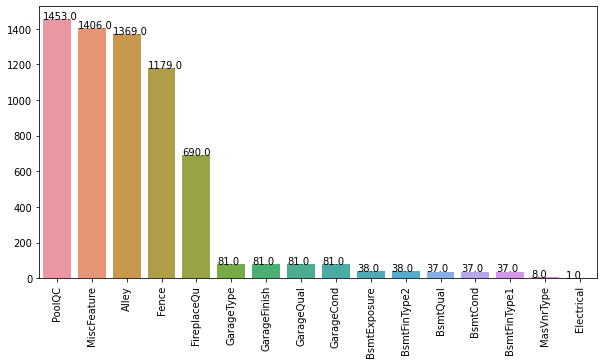

In [17]:
plt.figure(figsize = (10,5))
p = sns.barplot(x= categorical_null_counts.index, y= categorical_null_counts)
for bar in p.patches:
    p.annotate(bar.get_height(), (bar.get_x(), bar.get_height()))
plt.xticks(rotation = 90)
plt.show()

### Remove columns with more that 50% missing values
**PoolQC, MiscFeature, Alley, Fence** hase more than 80% missing data so we should remove these columns

In [18]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)
df.shape

(1460, 76)

In [19]:
#update categorical columns name
categorical = list(df.columns[df.dtypes == 'O'])
print(categorical)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [20]:
# unique values belongs with each categories
for col in categorical:
    print('{}, {}'.format(col, df[col].unique()))

MSZoning, ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street, ['Pave' 'Grvl']
LotShape, ['Reg' 'IR1' 'IR2' 'IR3']
LandContour, ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities, ['AllPub' 'NoSeWa']
LotConfig, ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope, ['Gtl' 'Mod' 'Sev']
Neighborhood, ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1, ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2, ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType, ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle, ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle, ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl, ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st, ['VinylSd' 'MetalSd' 'Wd Sdng' 

In [21]:
numerical_null_counts = df[numerical].isnull().sum().sort_values(ascending = False)[:5]
numerical_null_counts

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
KitchenAbvGr      0
dtype: int64

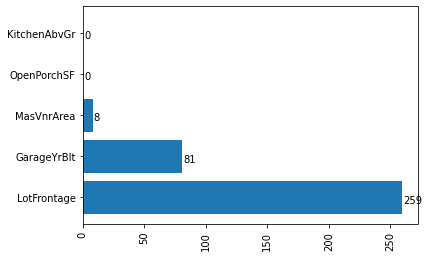

In [22]:
fig, ax = plt.subplots()
p = ax.barh(numerical_null_counts.index, numerical_null_counts)
for bar in p:
    ax.text( bar.get_width()+1 ,bar.get_y()+ bar.get_height()/3, bar.get_width()) # can also use ax.annotate
plt.xticks(rotation = 90)
plt.show()

### **Fill missing values**

The possible ways to do this are:

* Filling the missing data with the mean or median value if it’s a numerical variable.
* Filling the missing data with mode if it’s a categorical value.
* Filling the categorical value with a new type for the missing values.
* Filling the missing value with random values from the same column

In [23]:
null_counts = df[categorical].isnull().sum()[df[categorical].isnull().sum()>0].sort_values(ascending = False)
null_counts.index

Index(['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrType', 'Electrical'],
      dtype='object')

Fiiling **FireplaceQu** with random values and other categorical missing values with mode

In [24]:
def random_fill_mis(dataframe, col_name):
    #Select the rows with not null values
    non_null_rows = dataframe[col_name].dropna()
    # get random values
    random_data = non_null_rows.sample(dataframe[col_name].isnull().sum()).values
    # get index of null rows of a column
    row_index = dataframe[dataframe[col_name].isnull()].index
    #Fill null values with randdom values
    dataframe.loc[row_index,col_name] = random_data 

In [25]:
random_fill_mis(df,'FireplaceQu')

In [26]:
df['FireplaceQu'].isnull().sum()

0

Filling other categorical missing values with mode

In [27]:
cat_null_col= df[categorical].isnull().sum()[df[categorical].isnull().sum()>0].index
cat_null_col

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [28]:
for col in cat_null_col:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [29]:
numerical_null_counts

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
KitchenAbvGr      0
dtype: int64

In [30]:
null_num_col = df[numerical].isnull().sum()[df[numerical].isnull().sum()>0].index
null_num_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [31]:
random_fill_mis(df, 'LotFrontage')

In [32]:
for col in null_num_col:
    df[col].fillna(df[col].mode()[0], inplace = True)

In [33]:
#check if there are any missing value remains.
df.isnull().sum().sum()

0

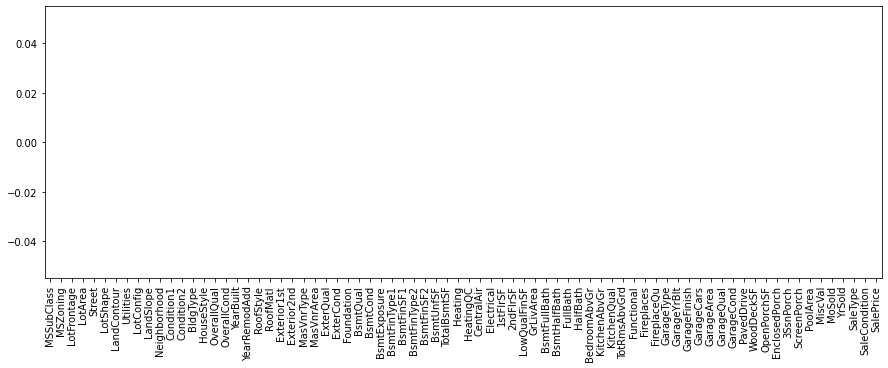

In [34]:
plt.figure(figsize = (15,5))
missing = df.isnull().sum()>0
sns.barplot( x= missing.index, y = missing.values)
plt.xticks(rotation = 90)
plt.show()

In [35]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

### Check if there are duplicate values

In [36]:
df.duplicated().sum()

0

## **Exploratory Data Analysis**

Finding Correlation between numerical features and SalePrice

In [37]:
corr_df = pd.DataFrame(df.corr().SalePrice.sort_values(ascending = False))
corr_df

SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.397778
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotFrontage     0.310361
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
EnclosedPorch  -0.128578
KitchenAbvGr   -0.135907

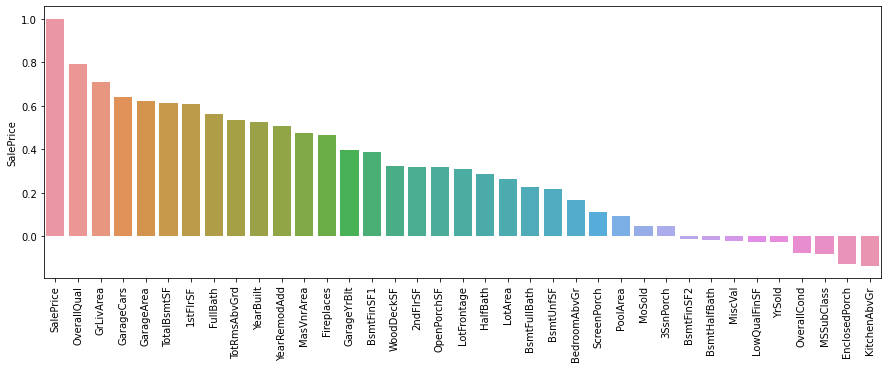

In [38]:
plt.figure(figsize = (15,5))
sns.barplot(x= corr_df.index,y= 'SalePrice', data = corr_df)
plt.xticks(rotation = 90)
plt.show()

Heatmap plot to see correlations among data

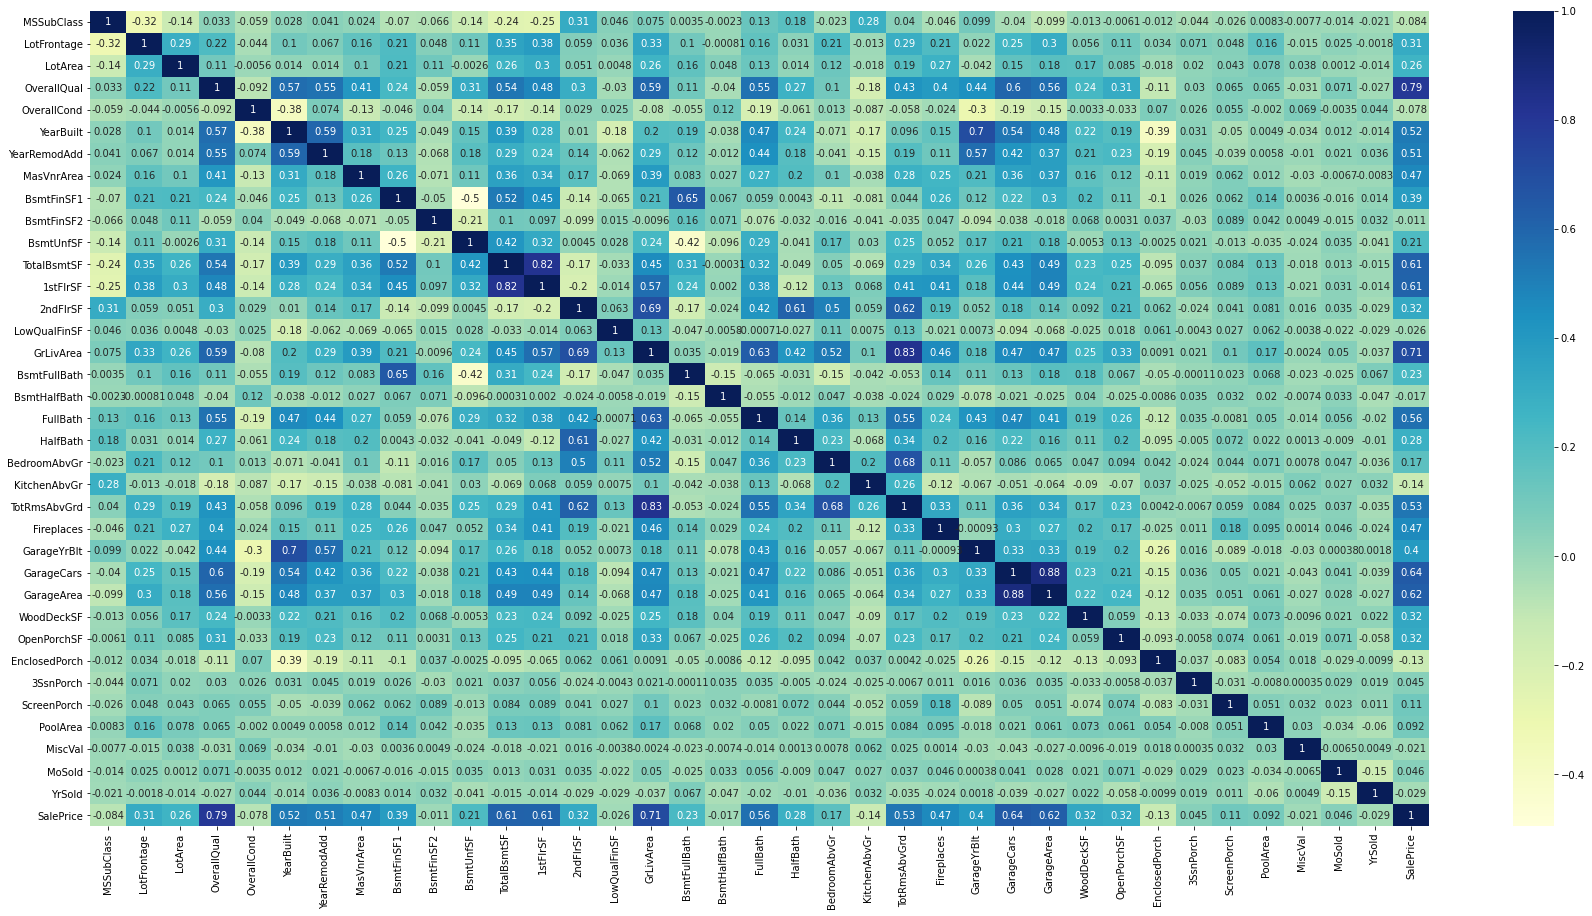

In [39]:
plt.figure(figsize = (30,15)),
corr_df = df.corr()
sns.heatmap(corr_df,annot=True , cmap="YlGnBu")
plt.show()

In [40]:
#'SalePrice' is most positively correlated with
corr_df = pd.DataFrame(df.corr().SalePrice.sort_values(ascending = False))
corr_df[:11]

SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101

Text(0.5, 0, 'Sale Price')

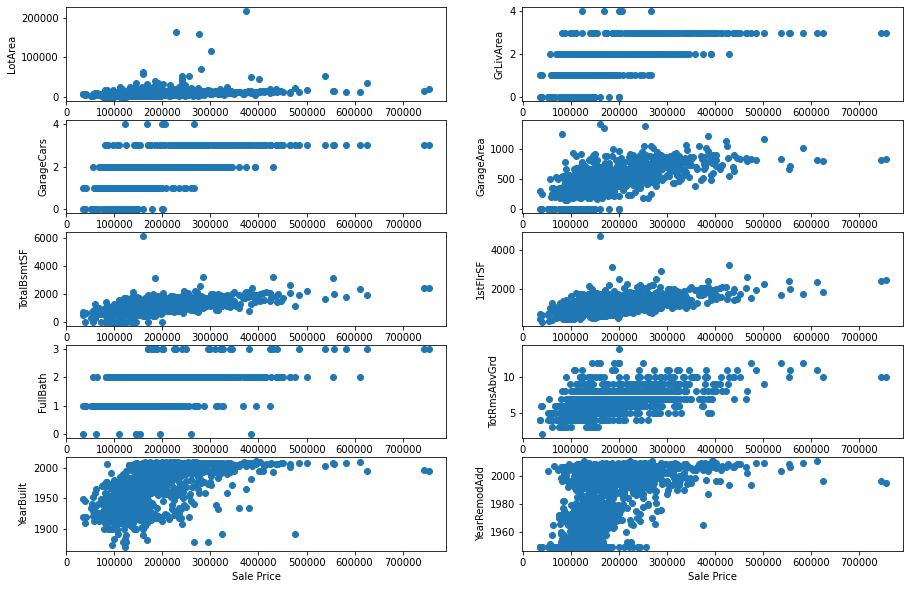

In [41]:
fig, ax = plt.subplots(5,2, figsize = (15,10))
ax[0][0].scatter(x = 'SalePrice',y = 'LotArea', data = df)
ax[0][0].set_ylabel("LotArea")

ax[0][1].scatter(x = 'SalePrice',y = 'GarageCars', data = df)
ax[0][1].set_ylabel("GrLivArea")

ax[1][0].scatter(x = 'SalePrice',y = 'GarageCars', data = df)
ax[1][0].set_ylabel("GarageCars")
ax[1][1].scatter(x = 'SalePrice',y = 'GarageArea', data = df)
ax[1][1].set_ylabel("GarageArea")

ax[2][0].scatter(x = 'SalePrice',y = 'TotalBsmtSF', data = df)
ax[2][0].set_ylabel("TotalBsmtSF")
ax[2][1].scatter(x = 'SalePrice',y = '1stFlrSF', data = df)
ax[2][1].set_ylabel("1stFlrSF")

ax[3][0].scatter(x = 'SalePrice',y = 'FullBath', data = df)
ax[3][0].set_ylabel("FullBath")
ax[3][1].scatter(x = 'SalePrice',y = 'TotRmsAbvGrd', data = df)
ax[3][1].set_ylabel("TotRmsAbvGrd")

ax[4][0].scatter(x = 'SalePrice',y = 'YearBuilt', data = df)
ax[4][0].set_ylabel("YearBuilt")
ax[4][0].set_xlabel("Sale Price")
ax[4][1].scatter(x = 'SalePrice',y = 'YearRemodAdd', data = df)
ax[4][1].set_ylabel("YearRemodAdd")
ax[4][1].set_xlabel("Sale Price")

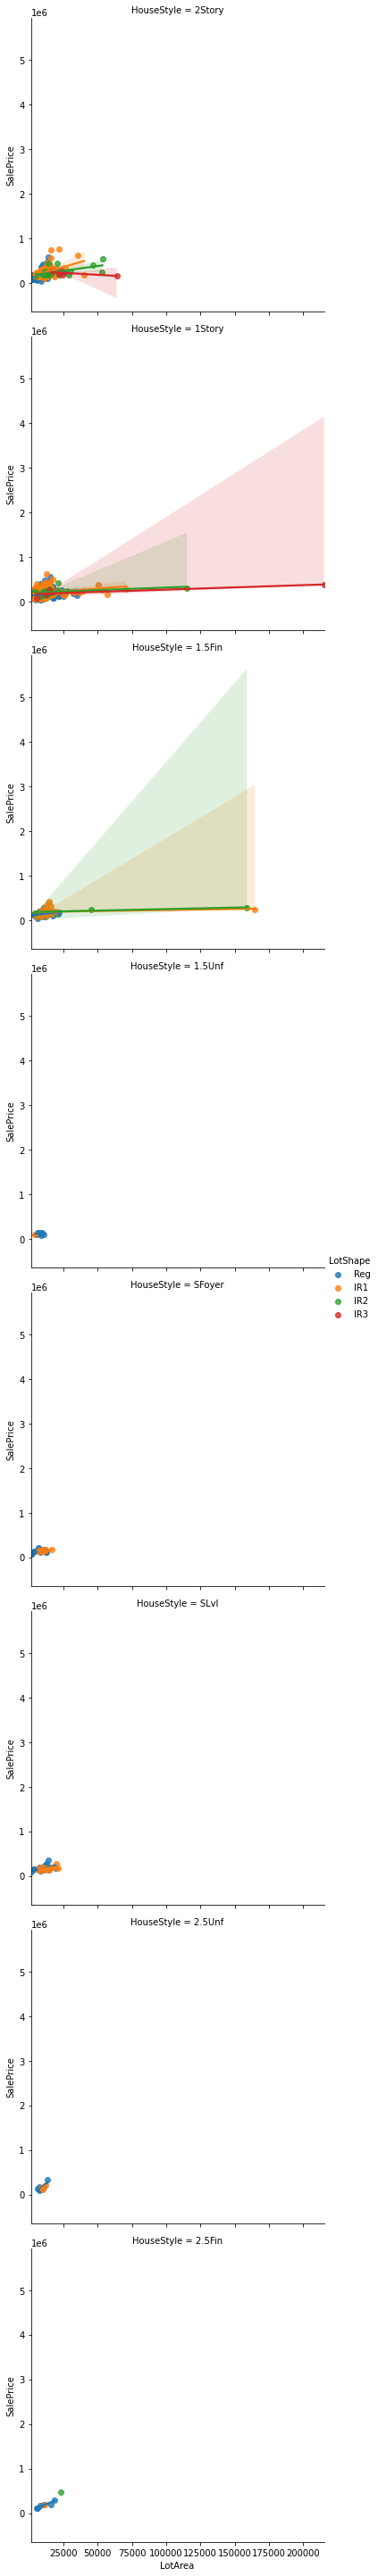

In [42]:

sns.lmplot(x = 'LotArea', y = 'SalePrice', data = df, row = 'HouseStyle', hue = 'LotShape')


In [43]:
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

<AxesSubplot:ylabel='YearBuilt'>

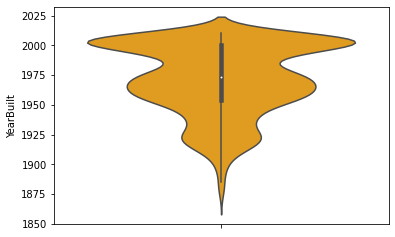

In [44]:
sns.violinplot(y = df['YearBuilt'], boxplot = True, color = "orange")

<AxesSubplot:ylabel='SalePrice'>

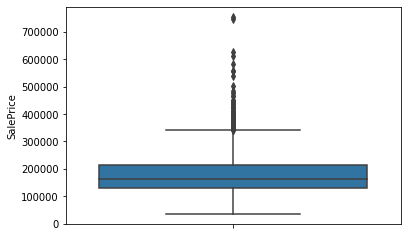

In [45]:
sns.boxplot(y= 'SalePrice', data = df.sort_values('SalePrice', ascending = False))

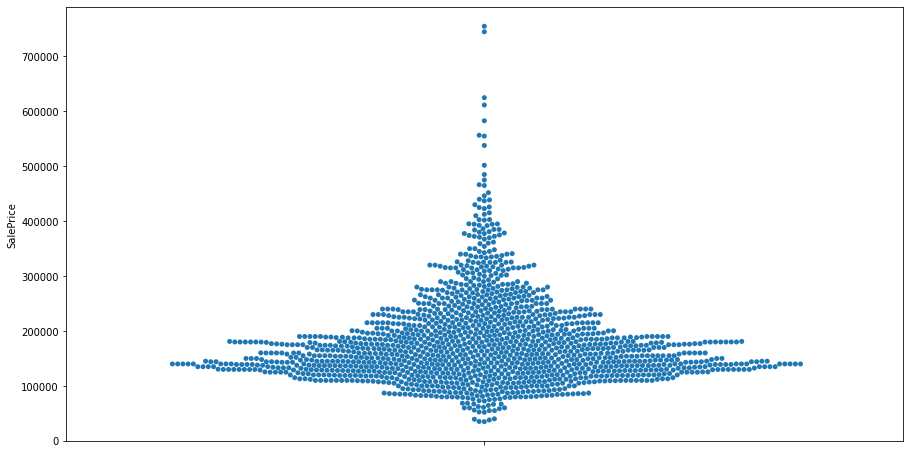

In [46]:
plt.figure( figsize = (15, 8))
sns.swarmplot(y= 'SalePrice', data = df.sort_values('SalePrice', ascending = False))
plt.show()

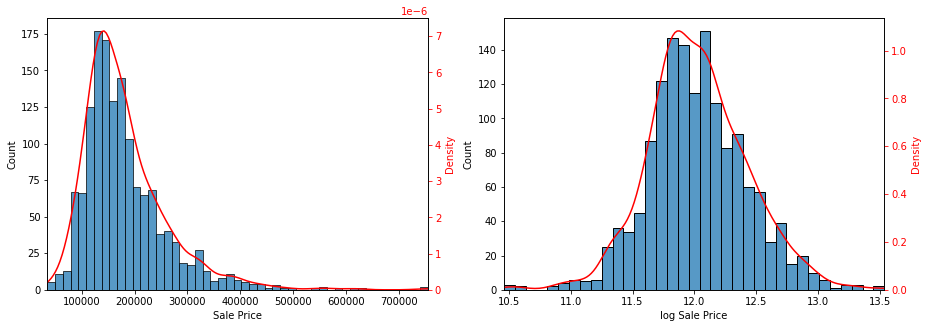

In [47]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.histplot(df['SalePrice'],  ax = ax[0])
ax1 = ax[0].twinx()
sns.kdeplot(df['SalePrice'],  ax = ax1, color = 'r',  )
ax1.set_ylabel('Density', color = 'r')
ax[0].set_xlabel('Sale Price')
ax[0].set_xlim(df['SalePrice'].min(), df['SalePrice'].max())
ax1.tick_params(axis='y', colors='red')

sns.histplot(np.log(df['SalePrice']), ax = ax[1])
ax[1].set_xlabel('log Sale Price')
ax[1].set_xlim(np.log(df['SalePrice']).min(), np.log(df['SalePrice']).max())
ax2 = ax[1].twinx()
sns.kdeplot(np.log(df['SalePrice']),  ax = ax2, color = 'r',  )
ax2.set_ylabel('Density', color = 'r')
ax2.tick_params(axis='y', colors='red')

In [48]:
# remove data with saleprice more than 700K
df.drop(df[df.SalePrice>700000].index, axis = 0, inplace = True)

/Users/riturajsingh/opt/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


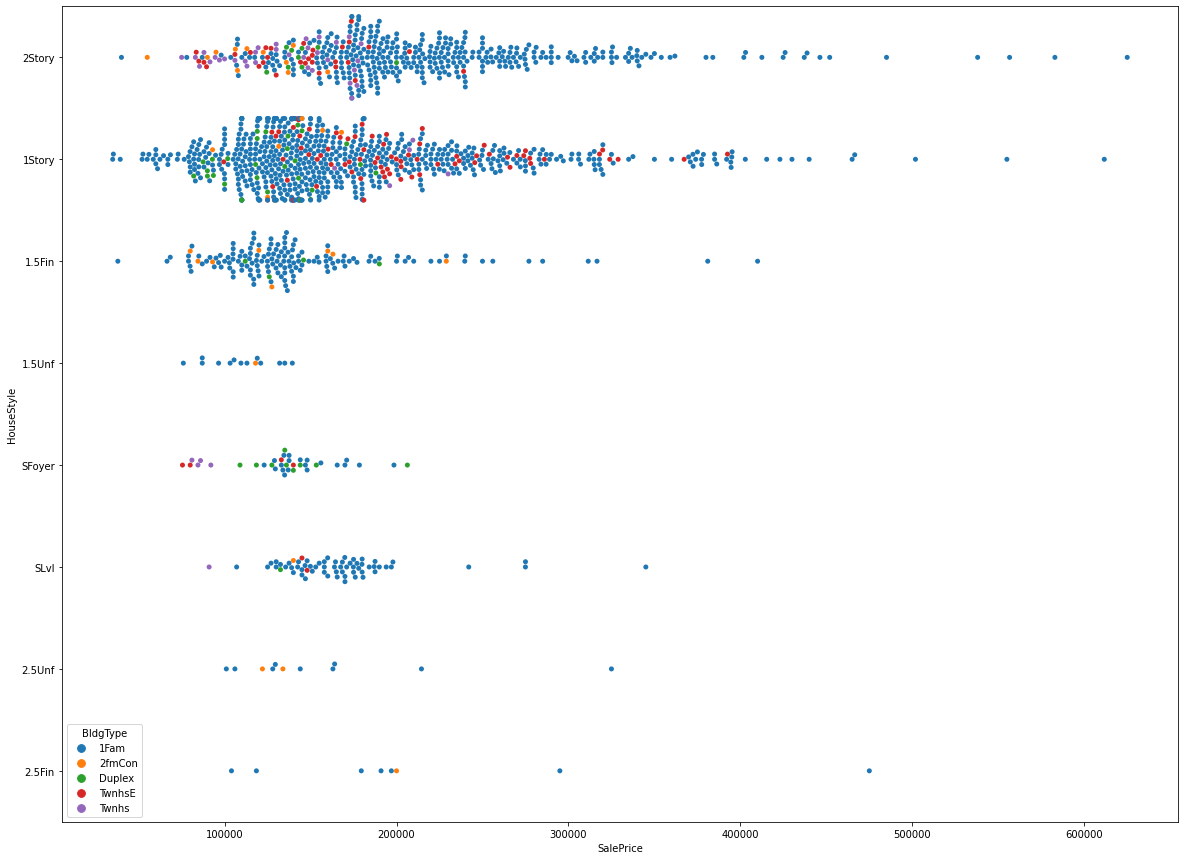

In [49]:
plt.figure(figsize=(20,15))
sns.swarmplot(y = 'HouseStyle', x = 'SalePrice', data = df, hue = 'BldgType')
plt.show()

In [50]:
print(f"mean Sale Price {df.SalePrice.mean()}" )
print("Max Sale Price {}" .format(df.SalePrice.max()))
print("Min Sale Price {}" .format(df.SalePrice.min()))

mean Sale Price 180140.56652949247
Max Sale Price 625000
Min Sale Price 34900


In [51]:
# sns.PairGrid(df)


Change categorical Values into numerical Values

In [52]:
df = pd.get_dummies(df)

In [53]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 276 columns]

In [54]:
X_train= df.drop('SalePrice', axis = 1)
y_train = df['SalePrice']

In [55]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 275 columns]